In [4]:
%matplotlib inline
from d2lzh import d2lzh as d2l
from mxnet import gluon, init
from mxnet.gluon import loss as gloss, nn

In [5]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [6]:
net = nn.Sequential()
net.add(nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

In [7]:
loss = gloss.SoftmaxCrossEntropyLoss()

In [8]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

In [9]:
num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer)

epoch 1, loss 0.7873, train acc 0.746, test acc 0.808
epoch 2, loss 0.5739, train acc 0.811, test acc 0.822
epoch 3, loss 0.5281, train acc 0.824, test acc 0.825
epoch 4, loss 0.5057, train acc 0.829, test acc 0.838
epoch 5, loss 0.4892, train acc 0.834, test acc 0.832


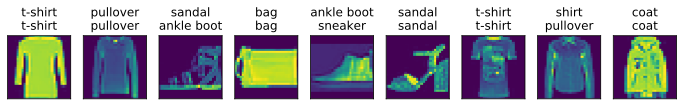

In [10]:
for X, y in train_iter:
    break

true_labels = d2l.get_fashion_mnist_labels(y.asnumpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
titles = [true_label + '\n' + pred_label 
          for true_label, pred_label in zip(true_labels, pred_labels)]

d2l.show_fashion_mnist(X[0:9], titles[0:9])